<a href="https://colab.research.google.com/github/as53175n/MENTAL-HEALTH-PROJECT/blob/main/Code2review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/")
!ls

Mounted at /content/drive/
drive  sample_data


In [ ]:
mh_dataset = pd.read_csv("/content/drive/MyDrive/MentalHealth/survey.csv")

In [ ]:
mh_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
print(mh_dataset['Country'].value_counts())
print("\n \n")
print(mh_dataset['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [ ]:
mh_dataset.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
print("The dataset contains different age groups including: \n")
print(mh_dataset['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(mh_dataset['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

In [ ]:
mh_dataset.drop(mh_dataset[mh_dataset['Age'] < 0].index, inplace = True)
mh_dataset.drop(mh_dataset[mh_dataset['Age'] > 100].index, inplace = True)
mh_dataset['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [ ]:
mh_dataset['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mh_dataset['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mh_dataset["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

mh_dataset['Gender'].value_counts()

,count
Gender,
Male,988
Female,247
Other,19


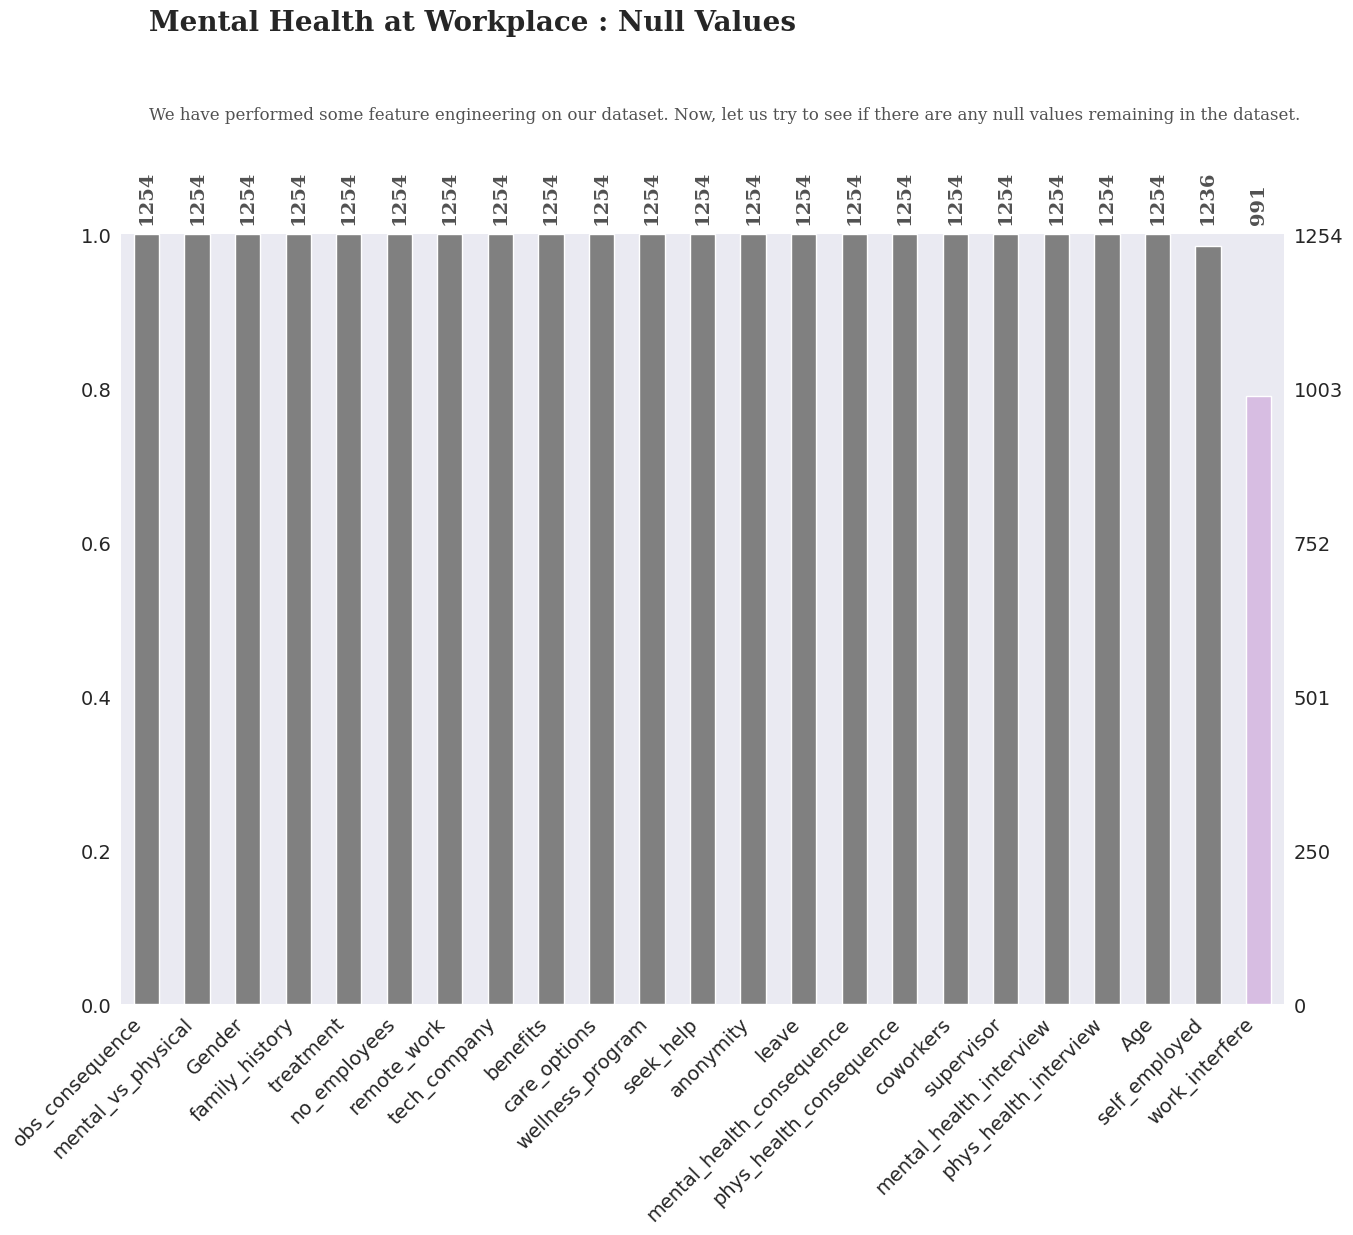

In [ ]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(mh_dataset,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [ ]:
mh_dataset['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
mh_dataset['self_employed'] = mh_dataset['self_employed'].fillna('No')
mh_dataset['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
mh_dataset['work_interfere'].unique()


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
mh_dataset['work_interfere'] = mh_dataset['work_interfere'].fillna("Don't Know")
mh_dataset['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [ ]:
mh_dataset['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,465
Don't Know,264
Never,213
Rarely,173
Often,144


  treatment  percentage
0       Yes    0.505957
1        No    0.494043


<Axes: title={'center': 'Number of Employees who wants to take Treatment'}, xlabel='treatment', ylabel='percentage'>

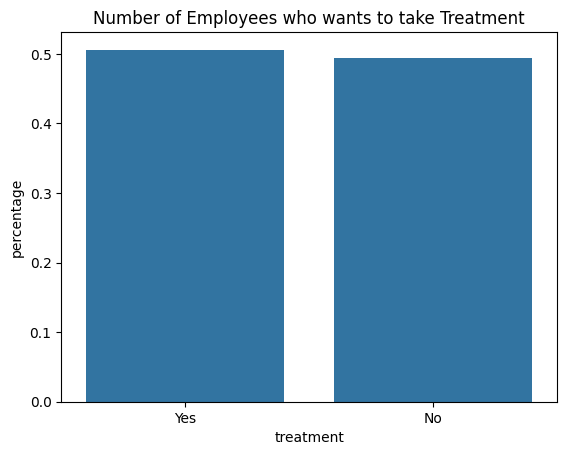

In [ ]:
par = mh_dataset['treatment'].value_counts(normalize=True).rename_axis('treatment').reset_index(name = 'percentage')
print(par)
plt.title('Number of Employees who wants to take Treatment')
sns.barplot(x = 'treatment', y = 'percentage', data = par)

<Axes: ylabel='percentage'>

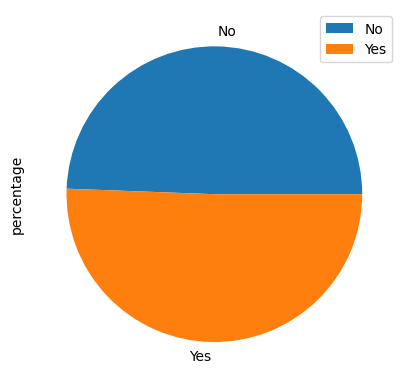

In [ ]:
par.groupby(['treatment']).sum().plot(kind='pie', y='percentage')

In [ ]:
def cal_per(col):
  percentage = col.value_counts(normalize=True).rename_axis(col.name).reset_index(name = 'percentage')
  return percentage

In [ ]:
def pl_fig(col, title1, title2):
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  per = cal_per(col)
  plt.title(title1)
  sns.barplot(x = col.name, y = 'percentage', data = per)
  plt.subplot(1,2,2)
  plt.title(title2)
  sns.countplot(x = col, y=None , hue=mh_dataset['treatment'])
  plt.show()


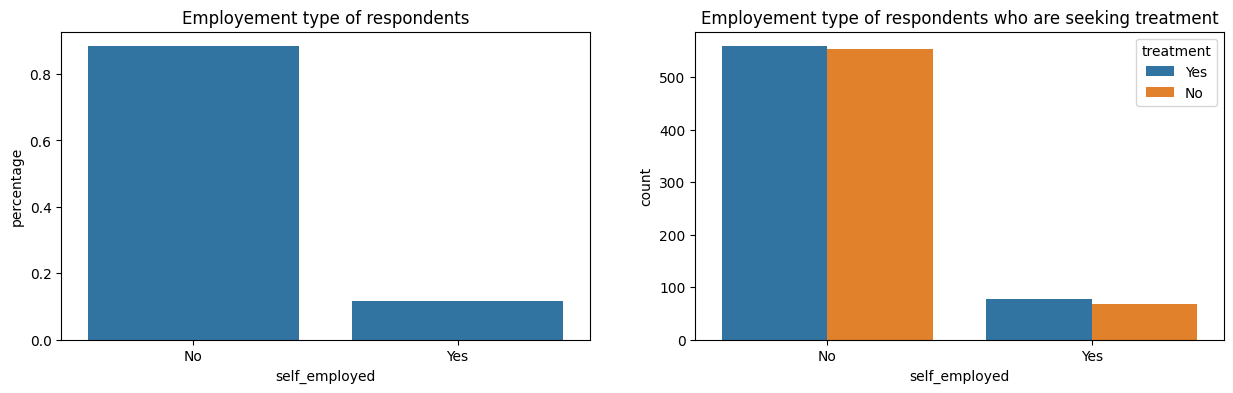

In [ ]:
title1 = 'Employement type of respondents'
title2 = 'Employement type of respondents who are seeking treatment'
pl_fig(mh_dataset['self_employed'],title1, title2)

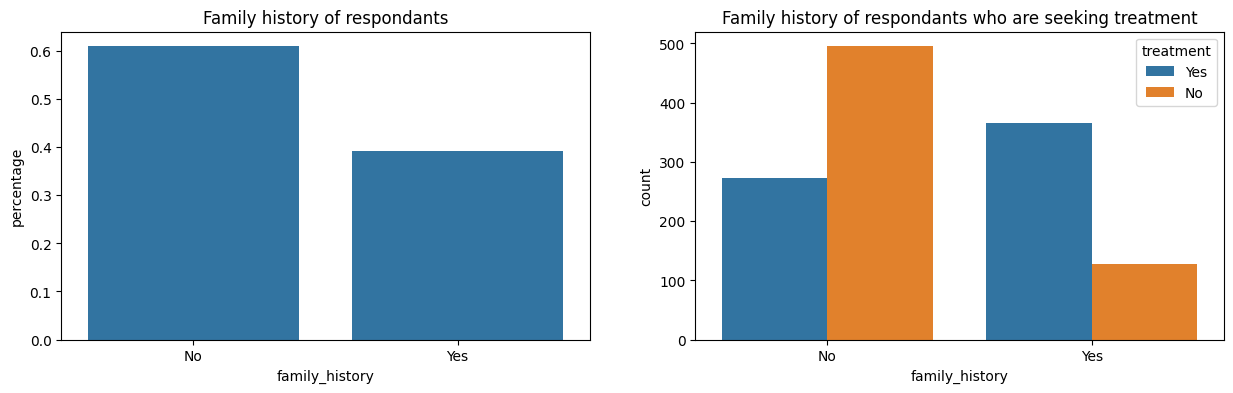

In [ ]:
title1 = 'Family history of respondants'
title2 = 'Family history of respondants who are seeking treatment'
pl_fig(mh_dataset['family_history'],title1, title2)

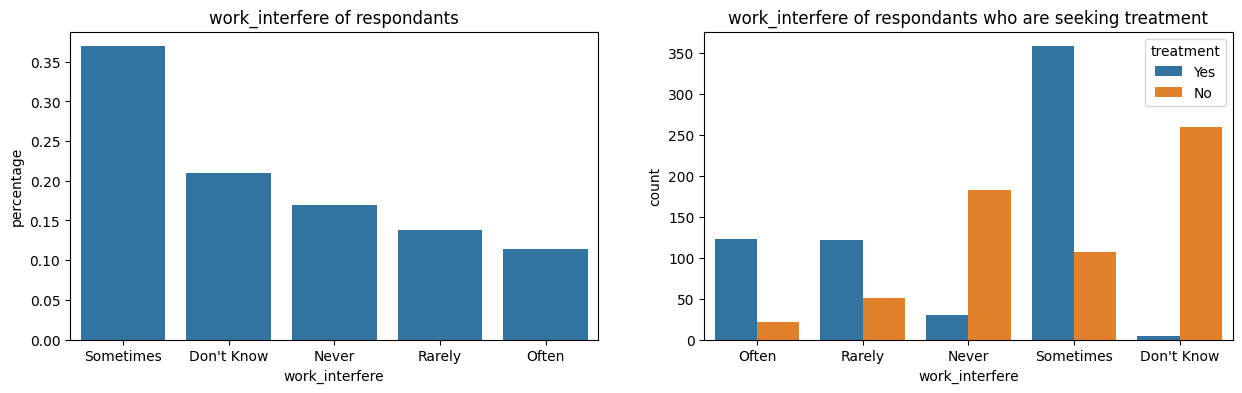

In [ ]:
title1 = 'work_interfere of respondants'
title2 = 'work_interfere of respondants who are seeking treatment'
pl_fig(mh_dataset['work_interfere'],title1, title2)

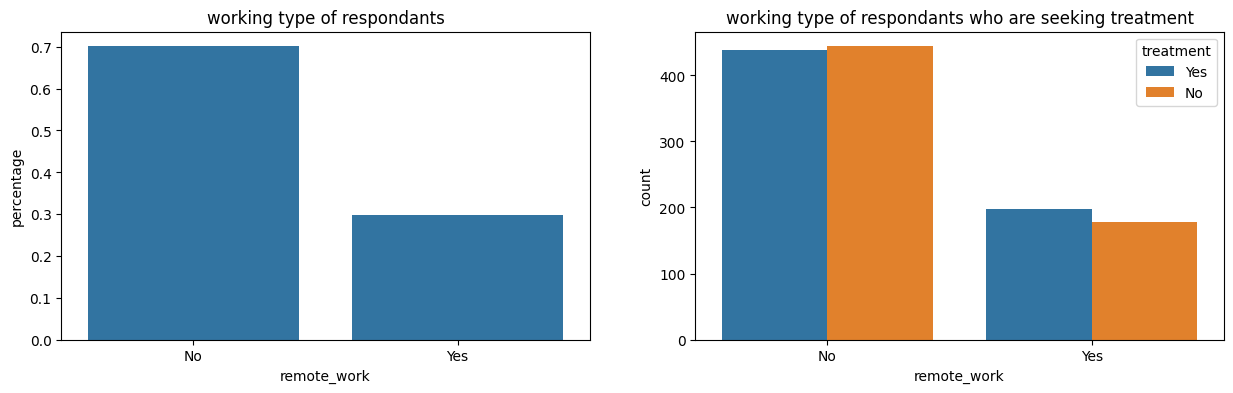

In [ ]:
title1 = 'working type of respondants'
title2 = 'working type of respondants who are seeking treatment'
pl_fig(mh_dataset['remote_work'],title1, title2)

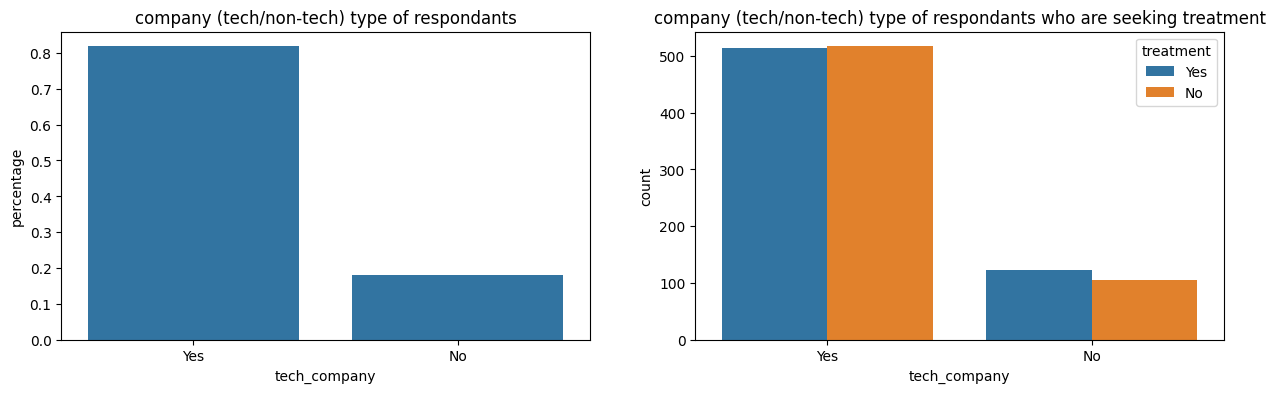

In [ ]:
title1 = 'company (tech/non-tech) type of respondants'
title2 = 'company (tech/non-tech) type of respondants who are seeking treatment'
pl_fig(mh_dataset['tech_company'],title1, title2)

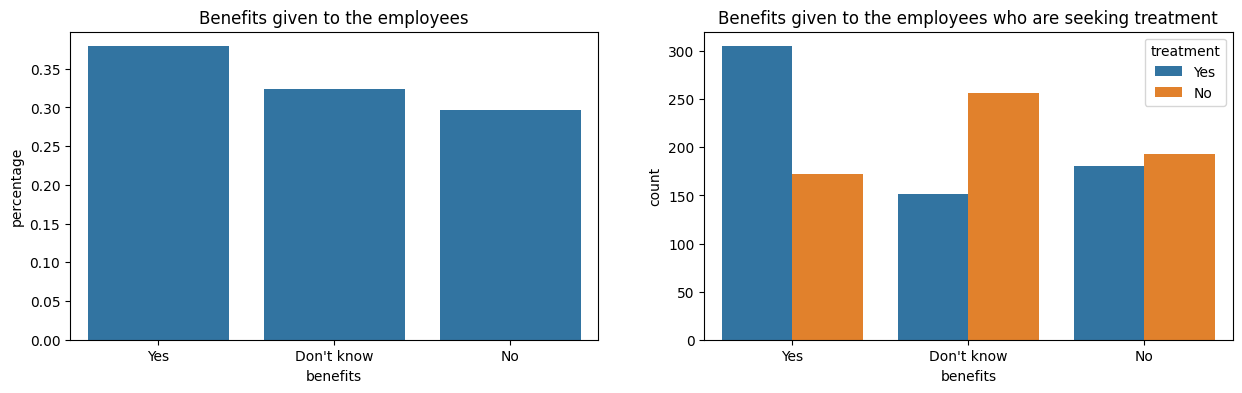

In [ ]:
title1 = 'Benefits given to the employees'
title2 = 'Benefits given to the employees who are seeking treatment'
pl_fig(mh_dataset['benefits'],title1, title2)

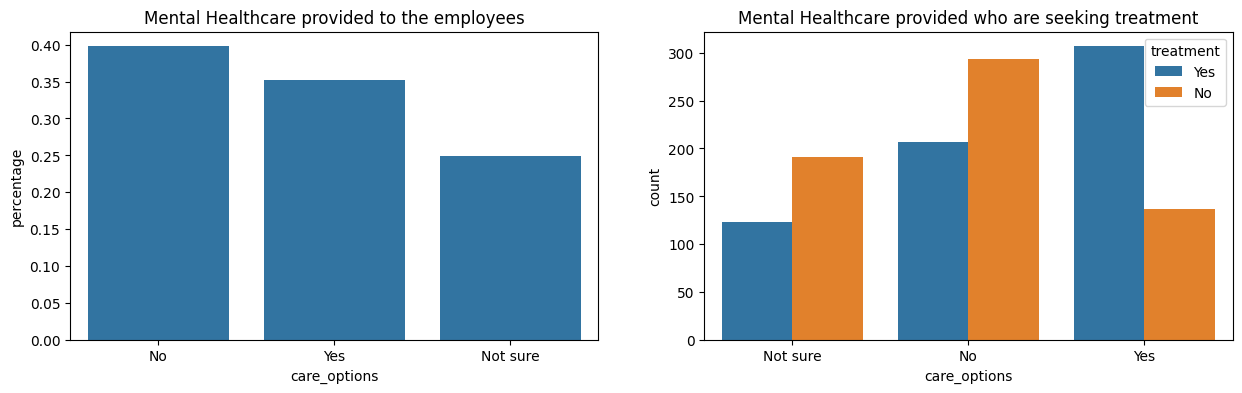

In [ ]:
title1 = 'Mental Healthcare provided to the employees'
title2 = 'Mental Healthcare provided who are seeking treatment'
pl_fig(mh_dataset['care_options'],title1, title2)

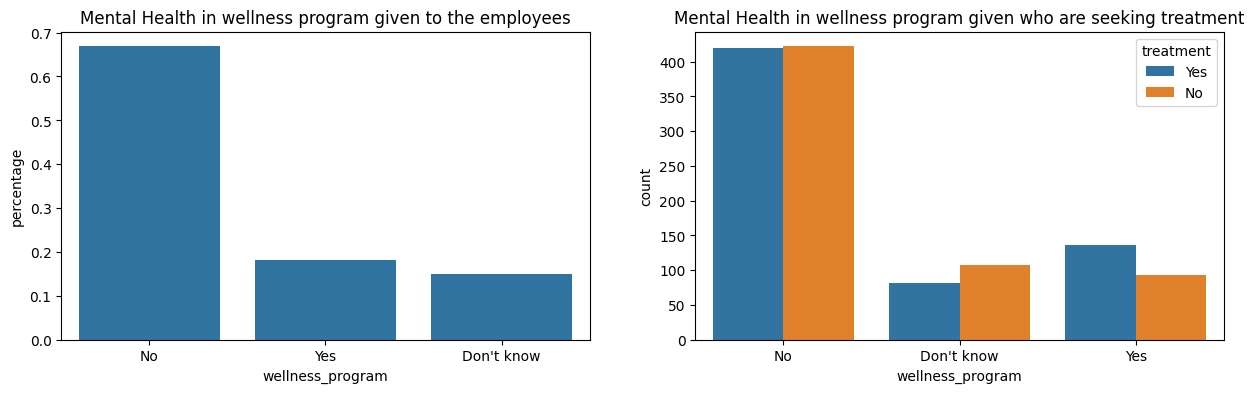

In [ ]:
title1 = 'Mental Health in wellness program given to the employees'
title2 = 'Mental Health in wellness program given who are seeking treatment'
pl_fig(mh_dataset['wellness_program'],title1, title2)

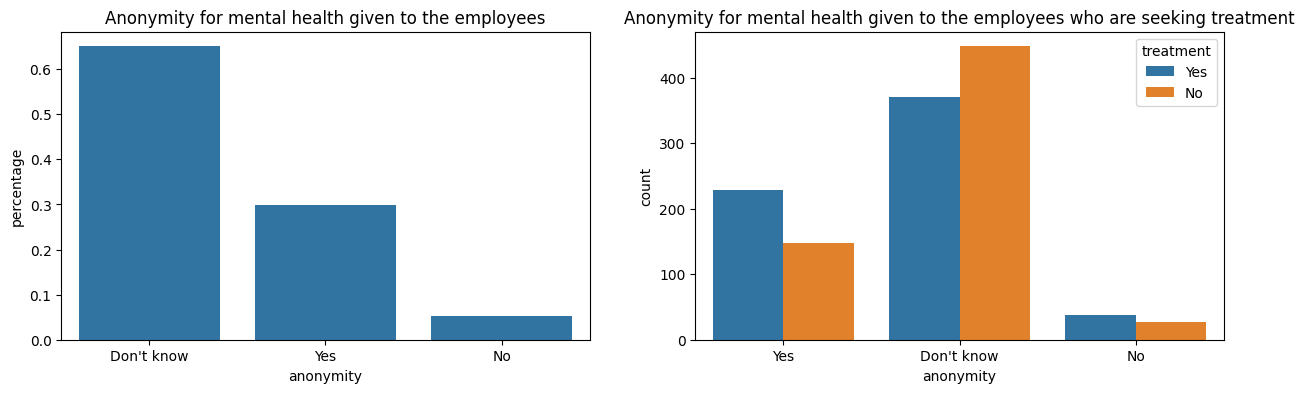

In [ ]:
title1 = 'Anonymity for mental health given to the employees'
title2 = 'Anonymity for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['anonymity'],title1, title2)

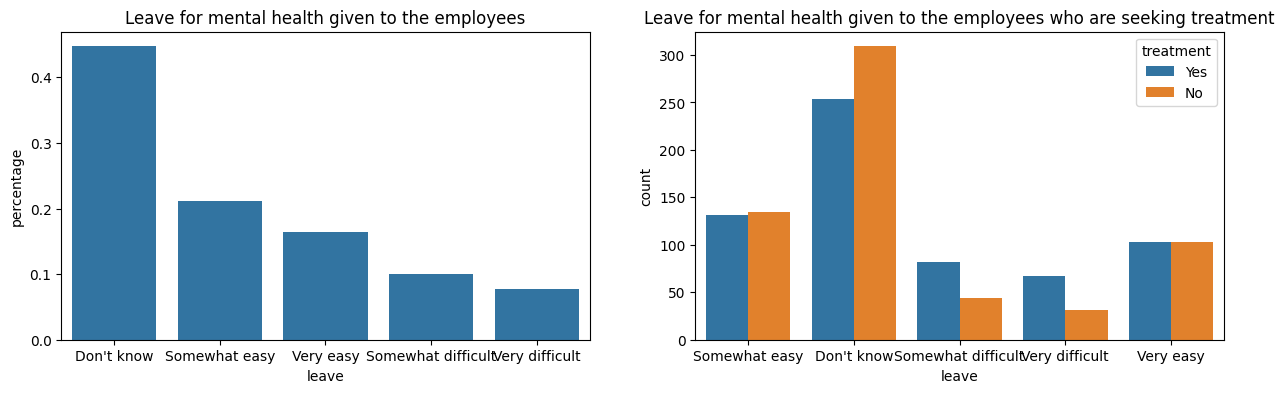

In [ ]:
title1 = 'Leave for mental health given to the employees'
title2 = 'Leave for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['leave'],title1, title2)

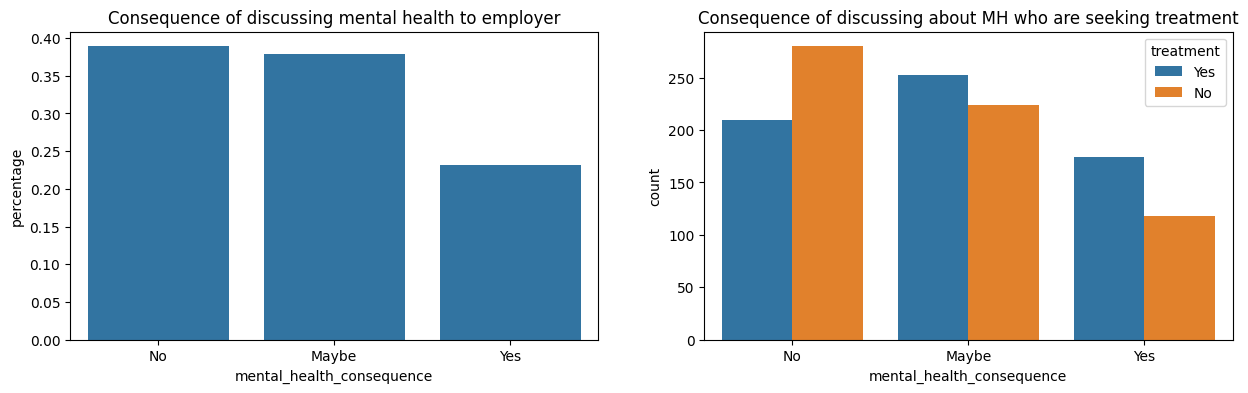

In [ ]:
title1 = 'Consequence of discussing mental health to employer'
title2 = 'Consequence of discussing about MH who are seeking treatment'
pl_fig(mh_dataset['mental_health_consequence'],title1, title2)

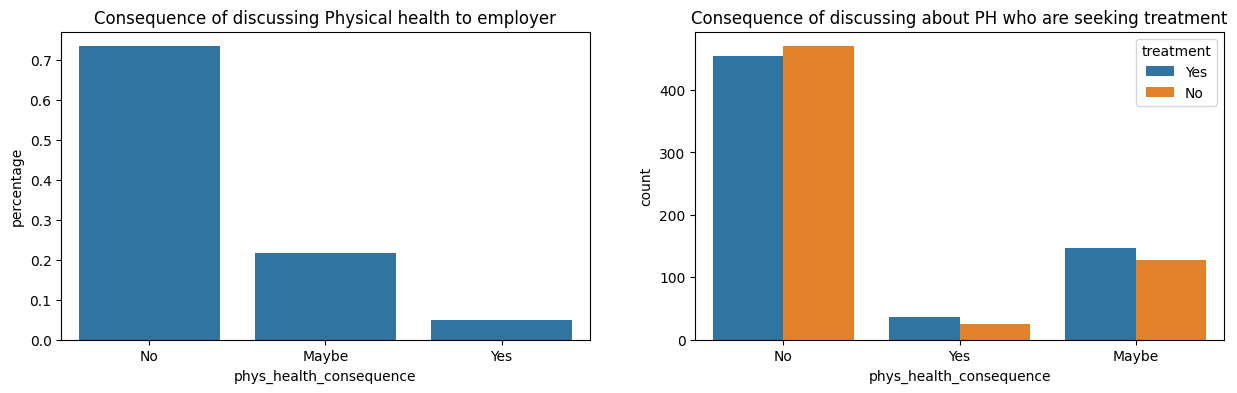

In [ ]:
title1 = 'Consequence of discussing Physical health to employer'
title2 = 'Consequence of discussing about PH who are seeking treatment'
pl_fig(mh_dataset['phys_health_consequence'],title1, title2)

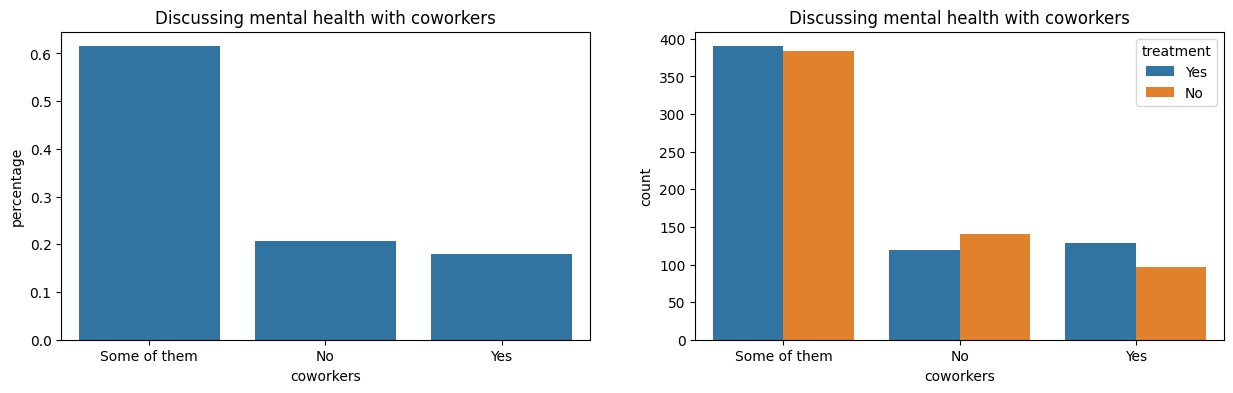

In [ ]:
title1 = 'Discussing mental health with coworkers'
pl_fig(mh_dataset['coworkers'],title1, title1)

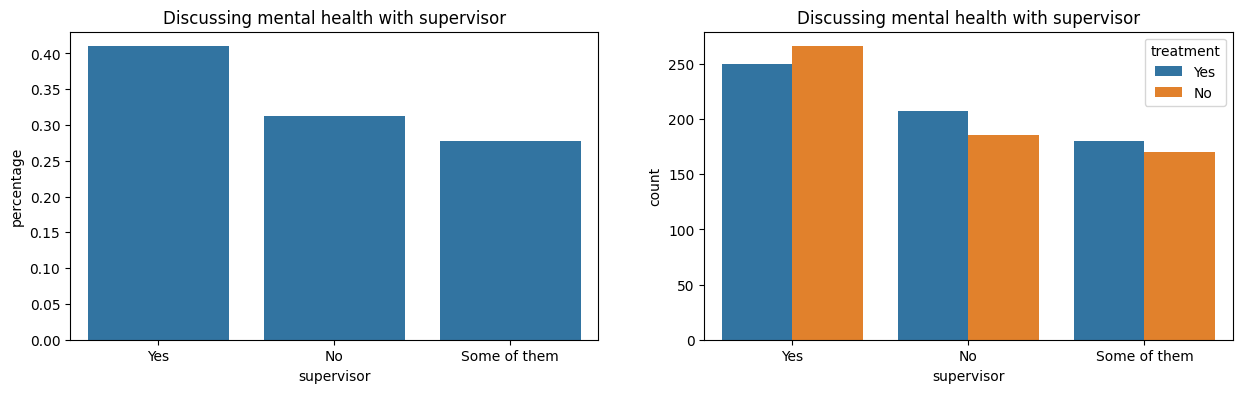

In [ ]:
title1 = 'Discussing mental health with supervisor'
pl_fig(mh_dataset['supervisor'],title1, title1)

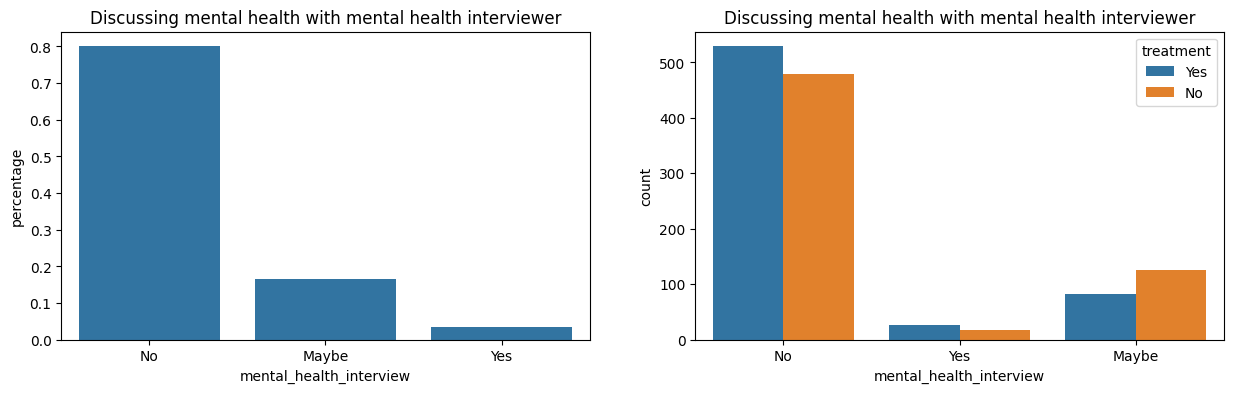

In [ ]:
title1 = 'Discussing mental health with mental health interviewer'
pl_fig(mh_dataset['mental_health_interview'],title1, title1)

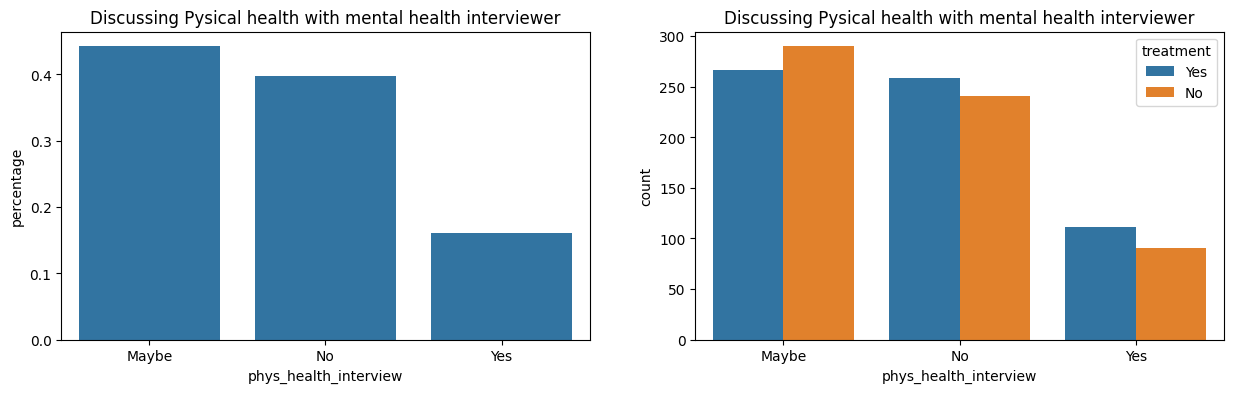

In [ ]:
title1 = 'Discussing Pysical health with mental health interviewer'
pl_fig(mh_dataset['phys_health_interview'],title1, title1)

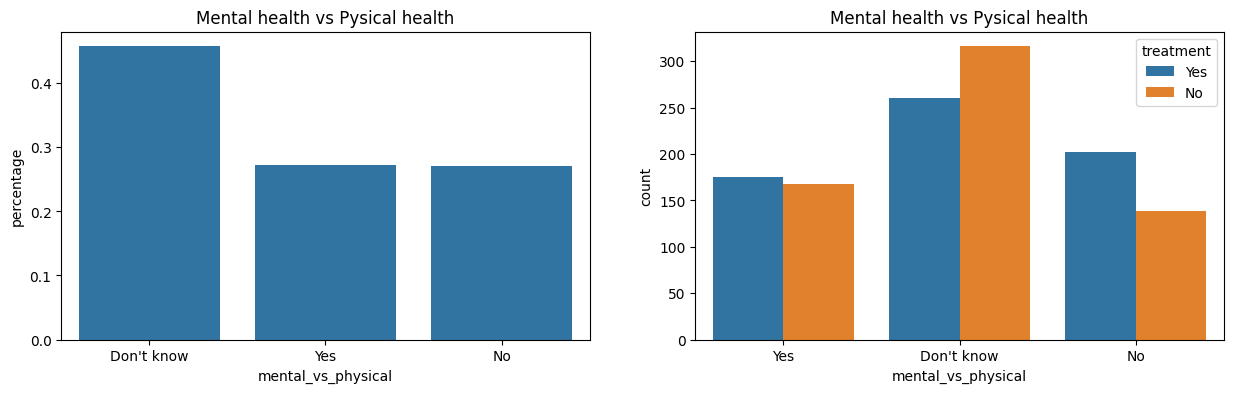

In [ ]:
title1 = "Mental health vs Pysical health"
pl_fig(mh_dataset['mental_vs_physical'],title1, title1)

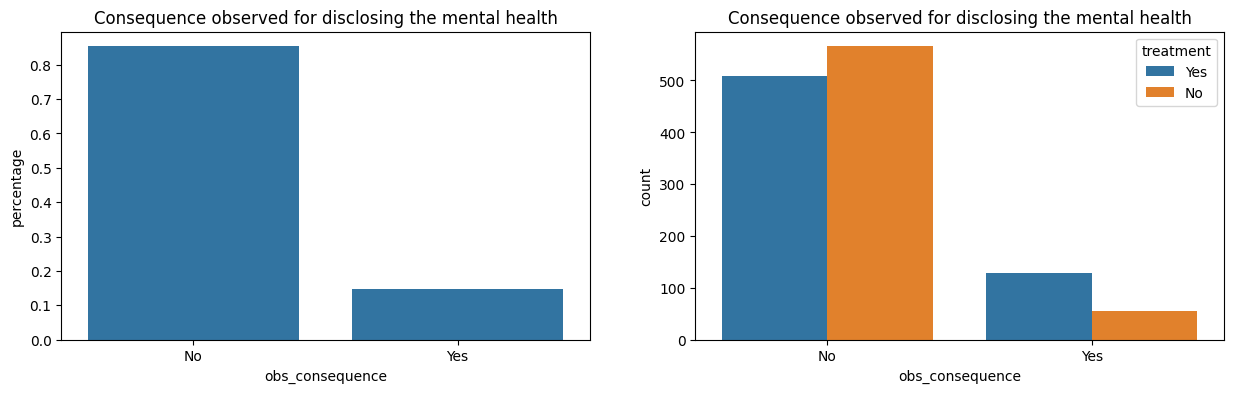

In [ ]:
title1 = 'Consequence observed for disclosing the mental health'
pl_fig(mh_dataset['obs_consequence'],title1, title1)